## Linear Regression using Gradient Descent

- Best fit line represented by y = m1 * x1 + m2 * x2 + m3 * x3 + ... + c
- Fit of line calculated by mean squared error
- parameters computed using gradient descent

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import make_regression

In [16]:
class linear_regression:
    def __init__(self,features=1,epochs=1000,learning_rate=0.001,regularization="None",lambda_=1):
        self.features=features
        ## Initializing weights and biases to 0
        self.weights=np.zeros(features)
        self.bias=0
        self.epochs=epochs
        self.regularization=regularization
        self.lambda_=lambda_
        self.learning_rate=learning_rate
    def mse(self,y,y_hat):
        diff=y-y_hat
        reg=0.
        if(self.regularization=="L1"):
            reg=np.sum(np.abs(self.weights))*self.lambda_
        if(self.regularization=="L2"):
            reg=np.sum(self.weights**2)*self.lambda_
        return np.sum(diff**2)/(2*len(y))+reg
    def fit(self,x,y,print_every_nth_epoch=1):
        assert self.features==x.shape[1],"Number of features don't match"
        assert y.shape[0]==x.shape[0],"Number of entries don't match"
        n=x.shape[0]
        for epoch in range(self.epochs):
            y_bar=np.dot(x,self.weights)+self.bias
            diff=y-y_bar
            grad_w=np.dot(x.T,diff)*self.learning_rate/n
            if(self.regularization=="L1"):
                sign=np.where(self.weights>0,1,-1)
                grad_w+=sign*self.lambda_
            if(self.regularization=="L2"):
                grad_w+=self.lambda_*2*self.weights
            self.weights+=grad_w
            grad_b=np.sum(diff)*self.learning_rate/n
            self.bias+=grad_b
            if((epoch+1)%print_every_nth_epoch==0):
                print("--------- epoch {} -------> loss={} ----------".format((epoch+1),self.mse(y,y_bar)))

    def predict(self,x):
        assert self.features==x.shape[1],"Number of features don't match"
        return np.dot(x,self.weights)+self.bias

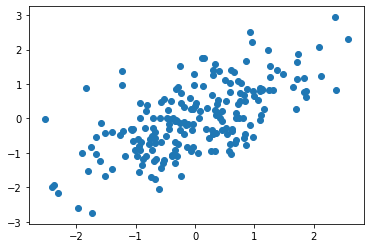

In [81]:
x,y=make_regression(n_features=1,n_samples=200,bias=20,noise=40)
x = preprocessing.scale(x)
y = preprocessing.scale(y)
plt.scatter(x,y)

In [68]:
model=linear_regression(epochs=500,learning_rate=0.01)
model.fit(x,y,print_every_nth_epoch=100)

--------- epoch 100 -------> loss=0.31214502836277674 ----------
--------- epoch 200 -------> loss=0.286384333699885 ----------
--------- epoch 300 -------> loss=0.2829329242048355 ----------
--------- epoch 400 -------> loss=0.2824705054828871 ----------
--------- epoch 500 -------> loss=0.2824085507728722 ----------


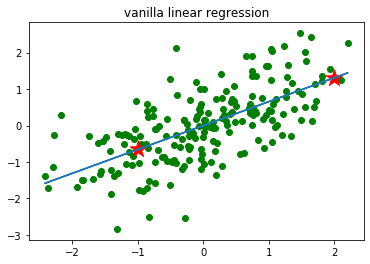

In [69]:
test_x=np.array([[-1],[1.99]])
test_y=model.predict(test_x)
plt.scatter(x,y,c='g')
plt.plot(x,model.predict(x))
plt.scatter(test_x,test_y,c='r',marker='*',s=300)
plt.title("vanilla linear regression")
plt.show()

### Testing multiple regression using polynomial data

      0
0 -1.00
1 -0.97
2 -0.94
3 -0.91
4 -0.88
          0
0  0.000000
1  0.028227
2  0.053016
3  0.074529
4  0.092928


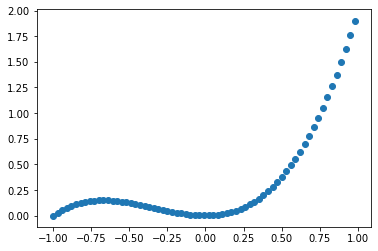

In [48]:
x1=pd.DataFrame(np.arange(-1,1,0.03))
y1=x1**3+x1**2
print(x1.head())
print(y1.head())
plt.scatter(x1,y1)
x1[1]=x1[0]**2
x1[2]=x1[0]**3
x1=x1.to_numpy()
y1=y1.to_numpy().T[0]

In [58]:
model1=linear_regression(features=3,epochs=1500,learning_rate=0.1)
model1.fit(x1,y1,print_every_nth_epoch=100)

--------- epoch 100 -------> loss=0.011552110536748886 ----------
--------- epoch 200 -------> loss=0.0046551392462024135 ----------
--------- epoch 300 -------> loss=0.002609457581778523 ----------
--------- epoch 400 -------> loss=0.0017192927336435327 ----------
--------- epoch 500 -------> loss=0.0011973885914993733 ----------
--------- epoch 600 -------> loss=0.0008477509170361644 ----------
--------- epoch 700 -------> loss=0.0006030121221081692 ----------
--------- epoch 800 -------> loss=0.0004294865512934423 ----------
--------- epoch 900 -------> loss=0.00030600645299420746 ----------
--------- epoch 1000 -------> loss=0.00021804965032662865 ----------
--------- epoch 1100 -------> loss=0.00015537902024510565 ----------
--------- epoch 1200 -------> loss=0.00011072170041058871 ----------
--------- epoch 1300 -------> loss=7.889946451992416e-05 ----------
--------- epoch 1400 -------> loss=5.6223208515692235e-05 ----------
--------- epoch 1500 -------> loss=4.0064273237193276e

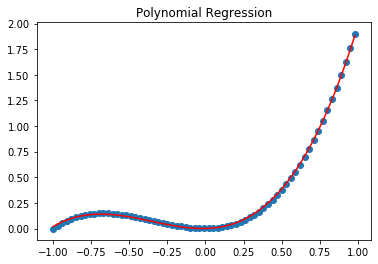

In [60]:
plt.scatter(x1.T[0],y1)
plt.plot(x1.T[0],model1.predict(x1),c="r")
plt.title("Polynomial Regression")
plt.show()

### Rigde Regression

In [89]:
model2=linear_regression(regularization="L2",lambda_=0.0001)
model2.fit(x,y,print_every_nth_epoch=100)

--------- epoch 100 -------> loss=0.4625467257744759 ----------
--------- epoch 200 -------> loss=0.43098686691656823 ----------
--------- epoch 300 -------> loss=0.40474679895388854 ----------
--------- epoch 400 -------> loss=0.3829895394827736 ----------
--------- epoch 500 -------> loss=0.3650057603218543 ----------
--------- epoch 600 -------> loss=0.35019460953770654 ----------
--------- epoch 700 -------> loss=0.3380473929073517 ----------
--------- epoch 800 -------> loss=0.32813369012186633 ----------
--------- epoch 900 -------> loss=0.32008954398735673 ----------
--------- epoch 1000 -------> loss=0.31360741450989815 ----------


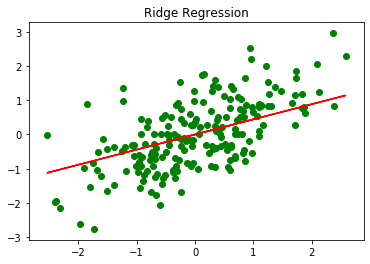

In [90]:
plt.plot(x,model2.predict(x),c="r")
plt.scatter(x,y,c='g')

plt.title("Ridge Regression")
plt.show()

### Lasso Regression

In [102]:
model3=linear_regression(regularization="L1",lambda_=0.00001,features=1)
model3.fit(x,y,print_every_nth_epoch=100)

--------- epoch 100 -------> loss=0.4623513491098576 ----------
--------- epoch 200 -------> loss=0.4312295175864619 ----------
--------- epoch 300 -------> loss=0.4058001967204183 ----------
--------- epoch 400 -------> loss=0.3850264225959205 ----------
--------- epoch 500 -------> loss=0.36805972581971985 ----------
--------- epoch 600 -------> loss=0.354205905936636 ----------
--------- epoch 700 -------> loss=0.34289701668239164 ----------
--------- epoch 800 -------> loss=0.3336684353515065 ----------
--------- epoch 900 -------> loss=0.32614009392653687 ----------
--------- epoch 1000 -------> loss=0.32000111691757815 ----------


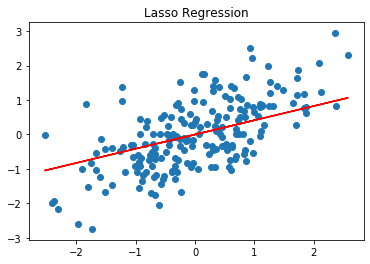

In [103]:
plt.scatter(x,y)
plt.plot(x,model3.predict(x),c="r")
plt.title("Lasso Regression")
plt.show()